In [14]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import folium
import plotly.graph_objs as go
import plotly.express as px
from keras.layers import Input, Dense, Activation, LeakyReLU
from keras import models
from keras.optimizers import RMSprop, Adam

%matplotlib inline
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_csv('Coronavirus_Tunisia_updated.csv')
data = data.fillna(0)
data4 = pd.DataFrame()
l=[]
more_90 = data[data["age"]>90.0]["age"].count()
b_81_90 = data[(81<=data["age"]) & (data["age"]<=90.0)]["age"].count()
b_71_80 = data[(71<=data["age"]) & (data["age"]<=80.0)]["age"].count()
b_61_70 = data[(61<=data["age"]) & (data["age"]<=70.0)]["age"].count()
b_51_60 = data[(51<=data["age"]) & (data["age"]<=60.0)]["age"].count()
b_41_50 = data[(41<=data["age"]) & (data["age"]<=50.0)]["age"].count()
b_31_40 = data[(31<=data["age"]) & (data["age"]<=40.0)]["age"].count()
b_21_30 = data[(21<=data["age"]) & (data["age"]<=30.0)]["age"].count()
b_11_20 = data[(11<=data["age"]) & (data["age"]<=20.0)]["age"].count()
b_1_10 = data[(0.1<=data["age"]) & (data["age"]<=10.0)]["age"].count()
l = [ ]
l2 = []

l = [b_1_10, b_11_20, b_21_30, b_31_40, b_41_50, b_51_60, b_61_70, b_71_80, b_81_90, more_90]
l2=["1-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", ">90"]

data4['Number of cases'] = l
data4['Age'] = l2

fig = px.bar(data4, x="Age", y="Number of cases", color='Number of cases', orientation='v', height=600,
             title='Confirmed cases in Tunisia: Breakdown by age', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [16]:
data = pd.read_csv('Coronavirus_Tunisia_updated.csv')
data = data.fillna('Unavailable')

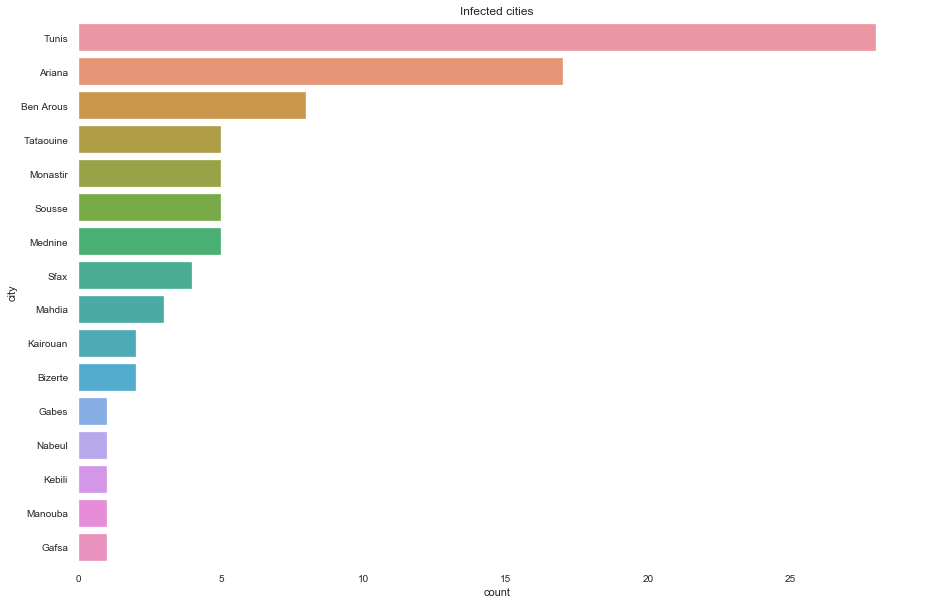

In [17]:
plt.figure(figsize=(15,10))
plt.title('Infected cities')
sns.countplot(y='city', data=data, order=data.city.value_counts().index)

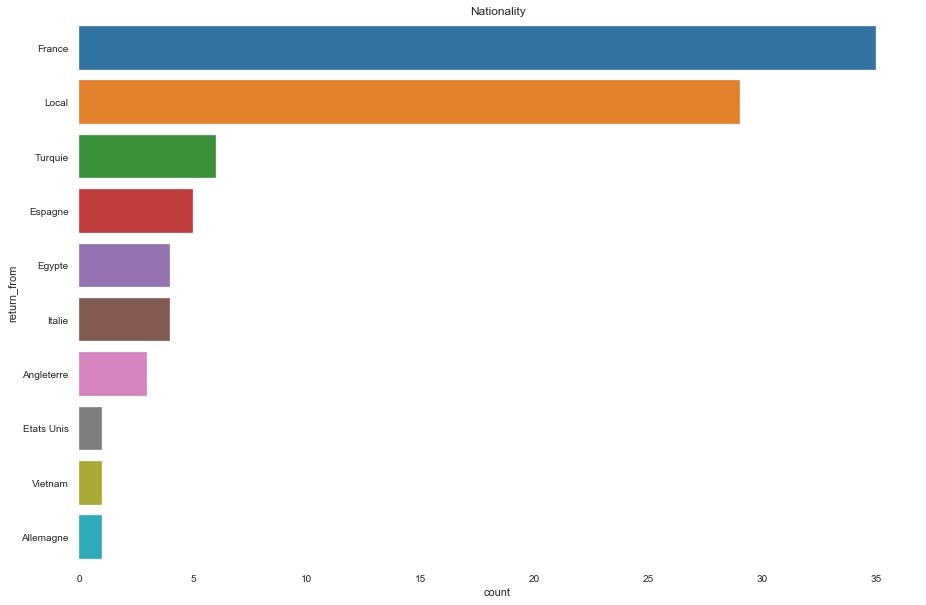

In [18]:
plt.figure(figsize=(15,10))
plt.title('Nationality')
sns.countplot(y='return_from', data=data, order=data.return_from.value_counts().index)

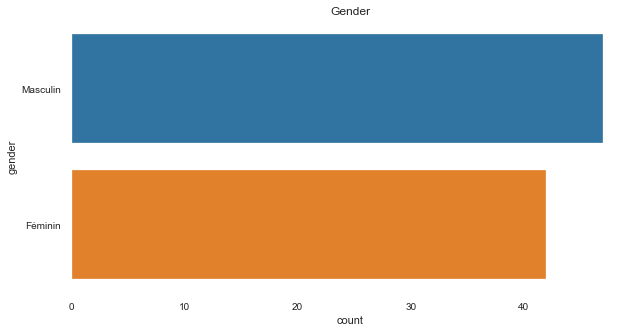

In [19]:
plt.figure(figsize=(10,5))
plt.title('Gender')
sns.countplot(y='gender', data=data, order=data.gender.value_counts().index)

In [20]:
count=[0]
confirmation_date=['2020-03-01']
count.extend(list(data.groupby(['confirmation_date'])['age'].count()))
confirmation_date.extend(sorted(list(set(data['confirmation_date']))))
l=['2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07']
l2=[0,0,0,0,0]
confirmation_date.insert(2, '2020-03-03')
confirmation_date.insert(3, '2020-03-04')
confirmation_date.insert(4, '2020-03-05')
confirmation_date.insert(5, '2020-03-06')
confirmation_date.insert(6, '2020-03-07')
confirmation_date.append('2020-03-23')
confirmation_date.append('2020-03-24')
confirmation_date.append('2020-03-25')
count.insert(2, 0)
count.insert(3, 0)
count.insert(4, 0)
count.insert(5, 0)
count.insert(6, 0)
count.append(25)
count.append(59)
count.append(24)
data_count=pd.DataFrame(count, confirmation_date, columns=["Number of cases"])
data_count.style.background_gradient(cmap='Reds')

,Number of cases
2020-03-01,0
2020-03-02,1
2020-03-03,0
2020-03-04,0
2020-03-05,0
2020-03-06,0
2020-03-07,0
2020-03-08,1
2020-03-09,3
2020-03-10,1


In [21]:
data_count['confirmation_date'] = list(data_count.index)
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_count['confirmation_date'], y=data_count['Number of cases'],
                    mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Confirmed cases in Tunisia each day',plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [22]:
fig = px.bar(data_count, x="confirmation_date", y="Number of cases", color='Number of cases', orientation='v', height=600,
             title='Confirmed cases in Tunisia each day', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [23]:
beds = pd.read_csv('Hospital_beds.csv')
s=0
for i in range (data_count.shape[0]):
    s = s+data_count['Number of cases'].iloc[i]
    data_count.loc[confirmation_date[i],'Number of cases'] = s


In [24]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_count['confirmation_date'], y=data_count['Number of cases'],
                    mode='lines+markers',name='Total Cases'))

fig.update_layout(title_text='Total Confirmed cases in Tunisia',plot_bgcolor='rgb(250, 242, 242)')

fig.show()

In [25]:
fig = px.bar(data_count, x="confirmation_date", y="Number of cases", color='Number of cases', orientation='v', height=600,
             title='Total Confirmed cases in Tunisia', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [26]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_count['confirmation_date'], y=data_count['Number of cases'],
                         mode='lines+markers',name='Total Cases'))

beds2=pd.DataFrame(beds['beds'].sum(), confirmation_date, columns=["beds"])
beds2['confirmation_date']=confirmation_date
fig.add_trace(go.Scatter(x=beds2['confirmation_date'], y=beds2['beds'],
                         mode='lines',name="Total hospital's capacity",
                         line=dict(color='rgb(220,21,22)',width=2)))

fig.update_layout(title_text="Total Confirmed cases in Tunisia with the total hospital's capacity",plot_bgcolor='rgb(250, 242, 242)')



In [27]:
france = pd.read_csv("Coronavirus_France.csv")

In [28]:
france.dropna(subset=['confirmed_date'], inplace=True)
count2=[0]
confirmation_date2=['2020-01-26']
count2.extend(list(france.groupby(['confirmed_date'])['country'].count()))
confirmation_date2.extend(sorted(list(set(france['confirmed_date']))))
l=['2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07']
confirmation_date2.insert(2, l[0])
confirmation_date2.insert(3, l[1])
confirmation_date2.insert(4, l[2])
confirmation_date2.insert(5, l[3])
confirmation_date2.insert(6, l[4])
confirmation_date2.insert(7, l[5])
confirmation_date2.insert(8, l[6])
confirmation_date2.insert(9, l[7])
confirmation_date2.insert(10, l[8])
confirmation_date2.insert(11, l[9])
confirmation_date2.insert(12, l[10])
count2.insert(2, 0)
count2.insert(3, 0)
count2.insert(4, 0)
count2.insert(5, 0)
count2.insert(6, 0)
count2.insert(7, 0)
count2.insert(8, 0)
count2.insert(9, 0)
count2.insert(10, 0)
count2.insert(11, 0)
count2.insert(12, 0)
data_count2=pd.DataFrame(count2, confirmation_date2, columns=["Number of cases"])

s=0
for i in range (data_count2.shape[0]):
    s = s+data_count2['Number of cases'].iloc[i]
    data_count2.loc[confirmation_date2[i],'Number of cases'] = s

day_fr=[]
day_tn=[]
for i in range (data_count2.shape[0]):
    day_fr.append("Day "+str(i+1))

data_count2['day'] = day_fr

for i in range (data_count.shape[0]):
    day_tn.append("Day "+str(i+1))
    
data_count['day'] = day_tn

fig = go.Figure()
fig.add_trace(go.Scatter(x=data_count['day'], y=data_count['Number of cases'],
                         mode='lines+markers',name='Total Cases in Tunisia'))

fig.add_trace(go.Scatter(x=data_count2['day'].iloc[:-5], y=data_count2['Number of cases'],
                         mode='lines+markers',name="Total Cases in France",
                         line=dict(color='rgb(220,21,22)',width=2)))

fig.update_layout(title_text="Comparison between confirmed cases in Tunisia and in France",plot_bgcolor='rgb(250, 242, 242)')

In [29]:
data2 = pd.DataFrame()
data2['city'] = data.city.unique()
data2 = data2.sort_values('city')
data2["lat"] = ""
data2["long"] = ""
for i in range(0, len(data2)):
    if(data2.iloc[i]["city"]=="Tunis"):
        data2["lat"].iloc[i] = 36.806112
        data2["long"].iloc[i] = 10.171078
        
    elif(data2.iloc[i]["city"]=="Ariana"):
        data2["lat"].iloc[i] = 36.860117
        data2["long"].iloc[i] = 10.193371
        
    elif(data2.iloc[i]["city"]=="Ben arous"):
        data2["lat"].iloc[i] = 36.753056
        data2["long"].iloc[i] = 10.218889
        
    elif(data2.iloc[i]["city"]=="La manouba"):
        data2["lat"].iloc[i] = 36.808029
        data2["long"].iloc[i] = 10.097205
        
    elif(data2.iloc[i]["city"]=="Nabeul"):
        data2["lat"].iloc[i] = 36.456058
        data2["long"].iloc[i] = 10.73763
    
    elif(data2.iloc[i]["city"]=="Zaghouan"):
        data2["lat"].iloc[i] = 36.402907
        data2["long"].iloc[i] = 10.142925
        
    elif(data2.iloc[i]["city"]=="Bizerte"):
        data2["lat"].iloc[i] = 37.274423
        data2["long"].iloc[i] = 9.87391
        
    elif(data2.iloc[i]["city"]=="Béja"):
        data2["lat"].iloc[i] = 36.725638
        data2["long"].iloc[i] = 9.181692
    
    elif(data2.iloc[i]["city"]=="Jendouba"):
        data2["lat"].iloc[i] = 36.501136
        data2["long"].iloc[i] = 8.780239
    
    elif(data2.iloc[i]["city"]=="Le kef"):
        data2["lat"].iloc[i] = 36.174239
        data2["long"].iloc[i] = 8.704863
    
    elif(data2.iloc[i]["city"]=="Siliana"):
        data2["lat"].iloc[i] = 36.084966
        data2["long"].iloc[i] = 9.370818
    
    elif(data2.iloc[i]["city"]=="Sousse"):
        data2["lat"].iloc[i] = 35.825388
        data2["long"].iloc[i] = 10.636991
    
    elif(data2.iloc[i]["city"]=="Monastir"):
        data2["lat"].iloc[i] = 35.783333
        data2["long"].iloc[i] = 10.833333
    
    elif(data2.iloc[i]["city"]=="Mahdia"):
        data2["lat"].iloc[i] = 35.504722
        data2["long"].iloc[i] = 11.062222
    
    elif(data2.iloc[i]["city"]=="Sfax"):
        data2["lat"].iloc[i] = 34.740556
        data2["long"].iloc[i] = 10.760278
    
    elif(data2.iloc[i]["city"]=="Kairouan"):
        data2["lat"].iloc[i] = 35.678102
        data2["long"].iloc[i] = 10.096333
    
    elif(data2.iloc[i]["city"]=="Kasserine"):
        data2["lat"].iloc[i] = 35.167578
        data2["long"].iloc[i] = 8.836506
    
    elif(data2.iloc[i]["city"]=="Sidi bouzid"):
        data2["lat"].iloc[i] = 35.038234
        data2["long"].iloc[i] = 9.484935
    
    elif(data2.iloc[i]["city"]=="Gabès"):
        data2["lat"].iloc[i] = 33.881457
        data2["long"].iloc[i] = 10.098196
    
    elif(data2.iloc[i]["city"]=="Médenine"):
        data2["lat"].iloc[i] = 33.354947
        data2["long"].iloc[i] = 10.505478
    
    elif(data2.iloc[i]["city"]=="Tataouine"):
        data2["lat"].iloc[i] = 32.929674
        data2["long"].iloc[i] = 10.451767
    
    elif(data2.iloc[i]["city"]=="Gafsa"):
        data2["lat"].iloc[i] = 34.425
        data2["long"].iloc[i] = 8.784167
    
    elif(data2.iloc[i]["city"]=="Tozeur"):
        data2["lat"].iloc[i] = 33.919683
        data2["long"].iloc[i] = 8.13352
    
    else:
        data2["lat"].iloc[i] = 33.704387
        data2["long"].iloc[i] = 8.969034
data2.reset_index(drop=True, inplace=True)

count2 = list(data.groupby(['city']).count()['confirmation_date'])
data2['count'] = count2

data3 = data.groupby('city').first()

first_date = list(data3.groupby('city').first()['confirmation_date'])
first_age = list(data3.groupby('city').first()['age'])
first_return_from = list(data3.groupby('city').first()['return_from'])
first_gender = list(data3.groupby('city').first()['gender'])

data2['Date_of_the_first_Coronavirus_case'] = first_date
data2['First_case_age'] = first_age
data2['Got_it_from'] = first_return_from
data2['First_case_gender'] = first_gender

In [30]:
m = folium.Map(location=[33.8869, 10], tiles='cartodbpositron', zoom_start=6)

for i in range(0, len(data2)):
    
    folium.Circle(
        location=[data2.iloc[i]['lat'], data2.iloc[i]['long']],
        color='crimson',
        tooltip =   '<li><bold>City : '+str(data2.iloc[i]['city'])+
                    '<li><bold>Number of cases : '+str(data2.iloc[i]['count'])+
                    '<li><bold>Date of the first Coronavirus case : '+str(data2.iloc[i]['Date_of_the_first_Coronavirus_case'])+
                    '<li><bold>First case age : '+str(data2.iloc[i]['First_case_age'])+
                    '<li><bold>First case gender : '+str(data2.iloc[i]['First_case_gender'])+
                    '<li><bold>Return from : '+str(data2.iloc[i]['Got_it_from']),
        
        radius=int(data2.iloc[i]['count']**3)**1).add_to(m)
    
m

In [31]:
l=(list(data_count.groupby('confirmation_date').sum()['Number of cases'].iloc[1:]))
l.append(197)
data_y = (np.asarray(l).astype("float32"))
data_x = np.arange(1,len(data_y)+1)

In [32]:
Visible = Input(shape=(1,))
Dense_l1 = Dense(150,name="Dense_l1")(Visible)
LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)
Dense_l2 = Dense(150,name = "Dense_l2")(LRelu_l1)
LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)
Dense_l2 = Dense(150,name = "Dense_l2")(LRelu_l1)
LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)
Dense_l3 = Dense(1,name="Dense_l3")(LRelu_l2)
LRelu_l3 = LeakyReLU(name = "Output")(Dense_l3)
model = models.Model(inputs=Visible, outputs=LRelu_l3)
model.compile(optimizer=Adam(lr=0.001), 
              loss='mean_squared_error',
              metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
Dense_l1 (Dense)             (None, 150)               300       
_________________________________________________________________
LRelu_l1 (LeakyReLU)         (None, 150)               0         
_________________________________________________________________
Dense_l2 (Dense)             (None, 150)               22650     
_________________________________________________________________
LRelu_l2 (LeakyReLU)         (None, 150)               0         
_________________________________________________________________
Dense_l3 (Dense)             (None, 1)                 151       
_________________________________________________________________
Output (LeakyReLU)           (None, 1)                 0   

In [33]:
epochs = 6000
model.fit(data_x.reshape([len(data_x), 1]),data_y.reshape([len(data_x), 1]),epochs=epochs)

W0327 05:26:34.669770 18748 deprecation_wrapper.py:119] From C:\Users\admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/6000
25/25 [==============================] - 3s 126ms/step - loss: 5514.0005 - accuracy: 0.1200
Epoch 2/6000
25/25 [==============================] - 0s 199us/step - loss: 5288.5142 - accuracy: 0.2000
Epoch 3/6000
25/25 [==============================] - 0s 200us/step - loss: 5066.7905 - accuracy: 0.0800
Epoch 4/6000
25/25 [==============================] - 0s 200us/step - loss: 4850.6768 - accuracy: 0.0800
Epoch 5/6000
25/25 [==============================] - 0s 200us/step - loss: 4640.1807 - accuracy: 0.1600
Epoch 6/6000
25/25 [==============================] - 0s 160us/step - loss: 4437.3950 - accuracy: 0.0400
Epoch 7/6000
25/25 [==============================] - 0s 160us/step - loss: 4242.5137 - accuracy: 0.0400
Epoch 8/6000
25/25 [==============================] - 0s 199us/step - loss: 4053.2588 - accuracy: 0.0400
Epoch 9/6000
25/25 [==============================] - 0s 199us/step - loss: 3866.2039 - accuracy: 0.0800
Epoch 10/6000
25/25 [==============================] - 

Epoch 77/6000
25/25 [==============================] - 0s 239us/step - loss: 1550.2209 - accuracy: 0.0000e+00
Epoch 78/6000
25/25 [==============================] - 0s 200us/step - loss: 1549.4966 - accuracy: 0.0000e+00
Epoch 79/6000
25/25 [==============================] - 0s 200us/step - loss: 1548.7819 - accuracy: 0.0000e+00
Epoch 80/6000
25/25 [==============================] - 0s 160us/step - loss: 1548.0508 - accuracy: 0.0000e+00
Epoch 81/6000
25/25 [==============================] - 0s 200us/step - loss: 1547.2828 - accuracy: 0.0000e+00
Epoch 82/6000
25/25 [==============================] - 0s 199us/step - loss: 1546.4653 - accuracy: 0.0000e+00
Epoch 83/6000
25/25 [==============================] - 0s 200us/step - loss: 1545.5930 - accuracy: 0.0000e+00
Epoch 84/6000
25/25 [==============================] - 0s 160us/step - loss: 1544.6665 - accuracy: 0.0000e+00
Epoch 85/6000
25/25 [==============================] - 0s 159us/step - loss: 1543.6924 - accuracy: 0.0000e+00
Epoch 86/6

Epoch 152/6000
25/25 [==============================] - 0s 200us/step - loss: 1467.8728 - accuracy: 0.0000e+00
Epoch 153/6000
25/25 [==============================] - 0s 160us/step - loss: 1466.4062 - accuracy: 0.0000e+00
Epoch 154/6000
25/25 [==============================] - 0s 240us/step - loss: 1464.9237 - accuracy: 0.0000e+00
Epoch 155/6000
25/25 [==============================] - 0s 160us/step - loss: 1463.4243 - accuracy: 0.0000e+00
Epoch 156/6000
25/25 [==============================] - 0s 241us/step - loss: 1461.9050 - accuracy: 0.0000e+00
Epoch 157/6000
25/25 [==============================] - 0s 159us/step - loss: 1460.3682 - accuracy: 0.0000e+00
Epoch 158/6000
25/25 [==============================] - 0s 160us/step - loss: 1458.8143 - accuracy: 0.0000e+00
Epoch 159/6000
25/25 [==============================] - 0s 240us/step - loss: 1457.2422 - accuracy: 0.0000e+00
Epoch 160/6000
25/25 [==============================] - 0s 200us/step - loss: 1455.6531 - accuracy: 0.0000e+00
E

Epoch 227/6000
25/25 [==============================] - 0s 160us/step - loss: 1284.4810 - accuracy: 0.0000e+00
Epoch 228/6000
25/25 [==============================] - 0s 200us/step - loss: 1280.7435 - accuracy: 0.0000e+00
Epoch 229/6000
25/25 [==============================] - 0s 200us/step - loss: 1276.9476 - accuracy: 0.0000e+00
Epoch 230/6000
25/25 [==============================] - 0s 240us/step - loss: 1273.1082 - accuracy: 0.0000e+00
Epoch 231/6000
25/25 [==============================] - 0s 161us/step - loss: 1269.1963 - accuracy: 0.0000e+00
Epoch 232/6000
25/25 [==============================] - 0s 199us/step - loss: 1265.2181 - accuracy: 0.0400
Epoch 233/6000
25/25 [==============================] - 0s 160us/step - loss: 1261.1449 - accuracy: 0.0400
Epoch 234/6000
25/25 [==============================] - 0s 200us/step - loss: 1256.9419 - accuracy: 0.0400
Epoch 235/6000
25/25 [==============================] - 0s 160us/step - loss: 1252.5262 - accuracy: 0.0400
Epoch 236/6000
25

Epoch 302/6000
25/25 [==============================] - 0s 199us/step - loss: 894.4288 - accuracy: 0.0000e+00
Epoch 303/6000
25/25 [==============================] - 0s 201us/step - loss: 888.2086 - accuracy: 0.0000e+00
Epoch 304/6000
25/25 [==============================] - 0s 200us/step - loss: 881.6469 - accuracy: 0.0000e+00
Epoch 305/6000
25/25 [==============================] - 0s 200us/step - loss: 874.9292 - accuracy: 0.0000e+00
Epoch 306/6000
25/25 [==============================] - 0s 200us/step - loss: 869.1880 - accuracy: 0.0000e+00
Epoch 307/6000
25/25 [==============================] - 0s 240us/step - loss: 863.4780 - accuracy: 0.0000e+00
Epoch 308/6000
25/25 [==============================] - 0s 200us/step - loss: 857.7405 - accuracy: 0.0400
Epoch 309/6000
25/25 [==============================] - 0s 200us/step - loss: 851.9150 - accuracy: 0.0400
Epoch 310/6000
25/25 [==============================] - 0s 160us/step - loss: 845.9160 - accuracy: 0.0400
Epoch 311/6000
25/25 [

Epoch 378/6000
25/25 [==============================] - 0s 200us/step - loss: 533.1990 - accuracy: 0.0000e+00
Epoch 379/6000
25/25 [==============================] - 0s 160us/step - loss: 529.9907 - accuracy: 0.0000e+00
Epoch 380/6000
25/25 [==============================] - 0s 160us/step - loss: 526.7920 - accuracy: 0.0000e+00
Epoch 381/6000
25/25 [==============================] - 0s 200us/step - loss: 523.7011 - accuracy: 0.0000e+00
Epoch 382/6000
25/25 [==============================] - 0s 200us/step - loss: 520.5500 - accuracy: 0.0000e+00
Epoch 383/6000
25/25 [==============================] - 0s 161us/step - loss: 517.5812 - accuracy: 0.0000e+00
Epoch 384/6000
25/25 [==============================] - 0s 200us/step - loss: 514.4757 - accuracy: 0.0000e+00
Epoch 385/6000
25/25 [==============================] - 0s 200us/step - loss: 511.5367 - accuracy: 0.0000e+00
Epoch 386/6000
25/25 [==============================] - 0s 161us/step - loss: 508.5494 - accuracy: 0.0000e+00
Epoch 387/

Epoch 454/6000
25/25 [==============================] - 0s 201us/step - loss: 362.1701 - accuracy: 0.0400
Epoch 455/6000
25/25 [==============================] - 0s 160us/step - loss: 360.6227 - accuracy: 0.0400
Epoch 456/6000
25/25 [==============================] - 0s 199us/step - loss: 359.0961 - accuracy: 0.0400
Epoch 457/6000
25/25 [==============================] - 0s 161us/step - loss: 357.6021 - accuracy: 0.0400
Epoch 458/6000
25/25 [==============================] - 0s 200us/step - loss: 356.1115 - accuracy: 0.0400
Epoch 459/6000
25/25 [==============================] - 0s 200us/step - loss: 354.6443 - accuracy: 0.0400
Epoch 460/6000
25/25 [==============================] - 0s 159us/step - loss: 353.1891 - accuracy: 0.0400
Epoch 461/6000
25/25 [==============================] - 0s 160us/step - loss: 351.7526 - accuracy: 0.0400
Epoch 462/6000
25/25 [==============================] - 0s 160us/step - loss: 350.3659 - accuracy: 0.0400
Epoch 463/6000
25/25 [========================

Epoch 530/6000
25/25 [==============================] - 0s 240us/step - loss: 274.7831 - accuracy: 0.0000e+00
Epoch 531/6000
25/25 [==============================] - 0s 159us/step - loss: 273.9535 - accuracy: 0.0000e+00
Epoch 532/6000
25/25 [==============================] - 0s 240us/step - loss: 273.0896 - accuracy: 0.0000e+00
Epoch 533/6000
25/25 [==============================] - 0s 197us/step - loss: 272.1954 - accuracy: 0.0000e+00
Epoch 534/6000
25/25 [==============================] - 0s 241us/step - loss: 271.3505 - accuracy: 0.0000e+00
Epoch 535/6000
25/25 [==============================] - 0s 200us/step - loss: 270.5350 - accuracy: 0.0000e+00
Epoch 536/6000
25/25 [==============================] - 0s 200us/step - loss: 269.6999 - accuracy: 0.0000e+00
Epoch 537/6000
25/25 [==============================] - 0s 240us/step - loss: 268.8524 - accuracy: 0.0000e+00
Epoch 538/6000
25/25 [==============================] - 0s 160us/step - loss: 267.9938 - accuracy: 0.0000e+00
Epoch 539/

Epoch 605/6000
25/25 [==============================] - 0s 200us/step - loss: 222.6689 - accuracy: 0.0000e+00
Epoch 606/6000
25/25 [==============================] - 0s 200us/step - loss: 221.9855 - accuracy: 0.0000e+00
Epoch 607/6000
25/25 [==============================] - 0s 160us/step - loss: 221.2470 - accuracy: 0.0000e+00
Epoch 608/6000
25/25 [==============================] - 0s 200us/step - loss: 220.6274 - accuracy: 0.0000e+00
Epoch 609/6000
25/25 [==============================] - 0s 160us/step - loss: 220.1710 - accuracy: 0.0000e+00
Epoch 610/6000
25/25 [==============================] - 0s 200us/step - loss: 219.7908 - accuracy: 0.0000e+00
Epoch 611/6000
25/25 [==============================] - 0s 199us/step - loss: 219.2371 - accuracy: 0.0000e+00
Epoch 612/6000
25/25 [==============================] - 0s 200us/step - loss: 218.5485 - accuracy: 0.0000e+00
Epoch 613/6000
25/25 [==============================] - 0s 200us/step - loss: 217.9187 - accuracy: 0.0000e+00
Epoch 614/

Epoch 680/6000
25/25 [==============================] - 0s 200us/step - loss: 188.5898 - accuracy: 0.0000e+00
Epoch 681/6000
25/25 [==============================] - 0s 200us/step - loss: 188.2434 - accuracy: 0.0000e+00
Epoch 682/6000
25/25 [==============================] - 0s 999us/step - loss: 187.9009 - accuracy: 0.0000e+00
Epoch 683/6000
25/25 [==============================] - 0s 200us/step - loss: 187.5620 - accuracy: 0.0000e+00
Epoch 684/6000
25/25 [==============================] - 0s 200us/step - loss: 187.2241 - accuracy: 0.0000e+00
Epoch 685/6000
25/25 [==============================] - 0s 200us/step - loss: 186.8880 - accuracy: 0.0000e+00
Epoch 686/6000
25/25 [==============================] - 0s 200us/step - loss: 186.5572 - accuracy: 0.0000e+00
Epoch 687/6000
25/25 [==============================] - 0s 200us/step - loss: 186.2325 - accuracy: 0.0000e+00
Epoch 688/6000
25/25 [==============================] - 0s 200us/step - loss: 185.9090 - accuracy: 0.0000e+00
Epoch 689/

25/25 [==============================] - 0s 200us/step - loss: 168.0361 - accuracy: 0.0400
Epoch 756/6000
25/25 [==============================] - 0s 200us/step - loss: 167.8240 - accuracy: 0.0400
Epoch 757/6000
25/25 [==============================] - 0s 160us/step - loss: 167.6147 - accuracy: 0.0400
Epoch 758/6000
25/25 [==============================] - 0s 200us/step - loss: 167.4077 - accuracy: 0.0400
Epoch 759/6000
25/25 [==============================] - 0s 200us/step - loss: 167.2017 - accuracy: 0.0400
Epoch 760/6000
25/25 [==============================] - 0s 161us/step - loss: 166.9969 - accuracy: 0.0400
Epoch 761/6000
25/25 [==============================] - 0s 241us/step - loss: 166.7919 - accuracy: 0.0400
Epoch 762/6000
25/25 [==============================] - 0s 159us/step - loss: 166.5879 - accuracy: 0.0400
Epoch 763/6000
25/25 [==============================] - 0s 160us/step - loss: 166.3852 - accuracy: 0.0400
Epoch 764/6000
25/25 [==============================] - 0s 20

25/25 [==============================] - 0s 119us/step - loss: 153.1512 - accuracy: 0.0400
Epoch 833/6000
25/25 [==============================] - 0s 120us/step - loss: 152.9563 - accuracy: 0.0400
Epoch 834/6000
25/25 [==============================] - 0s 200us/step - loss: 152.7614 - accuracy: 0.0400
Epoch 835/6000
25/25 [==============================] - 0s 159us/step - loss: 152.5665 - accuracy: 0.0400
Epoch 836/6000
25/25 [==============================] - 0s 200us/step - loss: 152.3875 - accuracy: 0.0400
Epoch 837/6000
25/25 [==============================] - 0s 160us/step - loss: 152.1991 - accuracy: 0.0400
Epoch 838/6000
25/25 [==============================] - 0s 202us/step - loss: 152.0170 - accuracy: 0.0400
Epoch 839/6000
25/25 [==============================] - 0s 160us/step - loss: 151.8420 - accuracy: 0.0000e+00
Epoch 840/6000
25/25 [==============================] - 0s 200us/step - loss: 151.6600 - accuracy: 0.0400
Epoch 841/6000
25/25 [==============================] - 0

Epoch 908/6000
25/25 [==============================] - 0s 160us/step - loss: 140.1622 - accuracy: 0.0000e+00
Epoch 909/6000
25/25 [==============================] - 0s 160us/step - loss: 140.0120 - accuracy: 0.0400
Epoch 910/6000
25/25 [==============================] - 0s 160us/step - loss: 139.8391 - accuracy: 0.0000e+00
Epoch 911/6000
25/25 [==============================] - 0s 200us/step - loss: 139.6639 - accuracy: 0.0400
Epoch 912/6000
25/25 [==============================] - 0s 201us/step - loss: 139.4662 - accuracy: 0.0400
Epoch 913/6000
25/25 [==============================] - 0s 200us/step - loss: 139.2840 - accuracy: 0.0400
Epoch 914/6000
25/25 [==============================] - 0s 160us/step - loss: 139.1171 - accuracy: 0.0400
Epoch 915/6000
25/25 [==============================] - 0s 120us/step - loss: 138.9553 - accuracy: 0.0400
Epoch 916/6000
25/25 [==============================] - 0s 159us/step - loss: 138.7890 - accuracy: 0.0400
Epoch 917/6000
25/25 [================

Epoch 986/6000
25/25 [==============================] - 0s 160us/step - loss: 127.8538 - accuracy: 0.0400
Epoch 987/6000
25/25 [==============================] - 0s 160us/step - loss: 127.7163 - accuracy: 0.0400
Epoch 988/6000
25/25 [==============================] - 0s 160us/step - loss: 127.5731 - accuracy: 0.0400
Epoch 989/6000
25/25 [==============================] - 0s 201us/step - loss: 127.4523 - accuracy: 0.0400
Epoch 990/6000
25/25 [==============================] - 0s 200us/step - loss: 127.3365 - accuracy: 0.0400
Epoch 991/6000
25/25 [==============================] - 0s 200us/step - loss: 127.2386 - accuracy: 0.0400
Epoch 992/6000
25/25 [==============================] - 0s 160us/step - loss: 127.1081 - accuracy: 0.0400
Epoch 993/6000
25/25 [==============================] - 0s 201us/step - loss: 126.9438 - accuracy: 0.0400
Epoch 994/6000
25/25 [==============================] - 0s 160us/step - loss: 126.7299 - accuracy: 0.0400
Epoch 995/6000
25/25 [========================

Epoch 1063/6000
25/25 [==============================] - 0s 160us/step - loss: 116.4757 - accuracy: 0.0400
Epoch 1064/6000
25/25 [==============================] - 0s 200us/step - loss: 116.3607 - accuracy: 0.0800
Epoch 1065/6000
25/25 [==============================] - 0s 158us/step - loss: 116.2624 - accuracy: 0.0400
Epoch 1066/6000
25/25 [==============================] - 0s 200us/step - loss: 116.1116 - accuracy: 0.0800
Epoch 1067/6000
25/25 [==============================] - 0s 201us/step - loss: 115.9067 - accuracy: 0.0400
Epoch 1068/6000
25/25 [==============================] - 0s 200us/step - loss: 115.6983 - accuracy: 0.0800
Epoch 1069/6000
25/25 [==============================] - 0s 200us/step - loss: 115.5331 - accuracy: 0.0800
Epoch 1070/6000
25/25 [==============================] - 0s 161us/step - loss: 115.3967 - accuracy: 0.0400
Epoch 1071/6000
25/25 [==============================] - 0s 160us/step - loss: 115.2806 - accuracy: 0.0800
Epoch 1072/6000
25/25 [==============

Epoch 1139/6000
25/25 [==============================] - 0s 200us/step - loss: 105.1663 - accuracy: 0.0400
Epoch 1140/6000
25/25 [==============================] - 0s 200us/step - loss: 105.0175 - accuracy: 0.0000e+00
Epoch 1141/6000
25/25 [==============================] - 0s 240us/step - loss: 104.8626 - accuracy: 0.0400
Epoch 1142/6000
25/25 [==============================] - 0s 200us/step - loss: 104.7007 - accuracy: 0.0000e+00
Epoch 1143/6000
25/25 [==============================] - 0s 200us/step - loss: 104.5463 - accuracy: 0.0000e+00
Epoch 1144/6000
25/25 [==============================] - 0s 200us/step - loss: 104.4046 - accuracy: 0.0000e+00
Epoch 1145/6000
25/25 [==============================] - 0s 200us/step - loss: 104.2635 - accuracy: 0.0000e+00
Epoch 1146/6000
25/25 [==============================] - 0s 200us/step - loss: 104.1176 - accuracy: 0.0000e+00
Epoch 1147/6000
25/25 [==============================] - 0s 200us/step - loss: 103.9728 - accuracy: 0.0000e+00
Epoch 114

Epoch 1215/6000
25/25 [==============================] - 0s 199us/step - loss: 94.1503 - accuracy: 0.0400
Epoch 1216/6000
25/25 [==============================] - 0s 199us/step - loss: 94.0087 - accuracy: 0.0400
Epoch 1217/6000
25/25 [==============================] - 0s 160us/step - loss: 93.8673 - accuracy: 0.0400
Epoch 1218/6000
25/25 [==============================] - 0s 199us/step - loss: 93.7262 - accuracy: 0.0400
Epoch 1219/6000
25/25 [==============================] - 0s 201us/step - loss: 93.5853 - accuracy: 0.0400
Epoch 1220/6000
25/25 [==============================] - 0s 160us/step - loss: 93.4450 - accuracy: 0.0400
Epoch 1221/6000
25/25 [==============================] - 0s 240us/step - loss: 93.3051 - accuracy: 0.0400
Epoch 1222/6000
25/25 [==============================] - 0s 199us/step - loss: 93.1654 - accuracy: 0.0400
Epoch 1223/6000
25/25 [==============================] - 0s 200us/step - loss: 93.0272 - accuracy: 0.0400
Epoch 1224/6000
25/25 [=======================

Epoch 1293/6000
25/25 [==============================] - 0s 200us/step - loss: 82.9867 - accuracy: 0.0400
Epoch 1294/6000
25/25 [==============================] - 0s 160us/step - loss: 82.8079 - accuracy: 0.0400
Epoch 1295/6000
25/25 [==============================] - 0s 200us/step - loss: 82.6419 - accuracy: 0.0400
Epoch 1296/6000
25/25 [==============================] - 0s 160us/step - loss: 82.4892 - accuracy: 0.0400
Epoch 1297/6000
25/25 [==============================] - 0s 160us/step - loss: 82.3460 - accuracy: 0.0400
Epoch 1298/6000
25/25 [==============================] - 0s 201us/step - loss: 82.2065 - accuracy: 0.0400
Epoch 1299/6000
25/25 [==============================] - 0s 200us/step - loss: 82.0669 - accuracy: 0.0400
Epoch 1300/6000
25/25 [==============================] - 0s 160us/step - loss: 81.9219 - accuracy: 0.0400
Epoch 1301/6000
25/25 [==============================] - 0s 161us/step - loss: 81.7719 - accuracy: 0.0400
Epoch 1302/6000
25/25 [=======================

Epoch 1371/6000
25/25 [==============================] - 0s 201us/step - loss: 71.4670 - accuracy: 0.0800
Epoch 1372/6000
25/25 [==============================] - 0s 200us/step - loss: 71.3423 - accuracy: 0.0800
Epoch 1373/6000
25/25 [==============================] - 0s 240us/step - loss: 71.2152 - accuracy: 0.0800
Epoch 1374/6000
25/25 [==============================] - 0s 200us/step - loss: 71.0777 - accuracy: 0.0800
Epoch 1375/6000
25/25 [==============================] - 0s 159us/step - loss: 70.9383 - accuracy: 0.0800
Epoch 1376/6000
25/25 [==============================] - 0s 159us/step - loss: 70.7908 - accuracy: 0.0800
Epoch 1377/6000
25/25 [==============================] - 0s 160us/step - loss: 70.6435 - accuracy: 0.0800
Epoch 1378/6000
25/25 [==============================] - 0s 201us/step - loss: 70.4973 - accuracy: 0.0800
Epoch 1379/6000
25/25 [==============================] - 0s 199us/step - loss: 70.3565 - accuracy: 0.0800
Epoch 1380/6000
25/25 [=======================

Epoch 1449/6000
25/25 [==============================] - 0s 200us/step - loss: 61.6930 - accuracy: 0.0400
Epoch 1450/6000
25/25 [==============================] - 0s 160us/step - loss: 61.6440 - accuracy: 0.0400
Epoch 1451/6000
25/25 [==============================] - 0s 160us/step - loss: 61.6492 - accuracy: 0.0400
Epoch 1452/6000
25/25 [==============================] - 0s 160us/step - loss: 61.7307 - accuracy: 0.0400
Epoch 1453/6000
25/25 [==============================] - 0s 200us/step - loss: 61.8372 - accuracy: 0.0400
Epoch 1454/6000
25/25 [==============================] - 0s 160us/step - loss: 61.9963 - accuracy: 0.0000e+00
Epoch 1455/6000
25/25 [==============================] - 0s 200us/step - loss: 62.0029 - accuracy: 0.0400
Epoch 1456/6000
25/25 [==============================] - 0s 160us/step - loss: 61.8217 - accuracy: 0.0000e+00
Epoch 1457/6000
25/25 [==============================] - 0s 160us/step - loss: 61.3325 - accuracy: 0.0400
Epoch 1458/6000
25/25 [===============

Epoch 1527/6000
25/25 [==============================] - 0s 160us/step - loss: 53.9742 - accuracy: 0.1200
Epoch 1528/6000
25/25 [==============================] - 0s 161us/step - loss: 53.8846 - accuracy: 0.1200
Epoch 1529/6000
25/25 [==============================] - 0s 119us/step - loss: 53.7858 - accuracy: 0.1200
Epoch 1530/6000
25/25 [==============================] - 0s 160us/step - loss: 53.6803 - accuracy: 0.1200
Epoch 1531/6000
25/25 [==============================] - 0s 160us/step - loss: 53.5742 - accuracy: 0.1200
Epoch 1532/6000
25/25 [==============================] - 0s 200us/step - loss: 53.4798 - accuracy: 0.1200
Epoch 1533/6000
25/25 [==============================] - 0s 200us/step - loss: 53.3847 - accuracy: 0.1200
Epoch 1534/6000
25/25 [==============================] - 0s 200us/step - loss: 53.2988 - accuracy: 0.1200
Epoch 1535/6000
25/25 [==============================] - 0s 160us/step - loss: 53.2169 - accuracy: 0.1200
Epoch 1536/6000
25/25 [=======================

Epoch 1605/6000
25/25 [==============================] - 0s 199us/step - loss: 48.8341 - accuracy: 0.2400
Epoch 1606/6000
25/25 [==============================] - 0s 160us/step - loss: 48.7908 - accuracy: 0.2400
Epoch 1607/6000
25/25 [==============================] - 0s 200us/step - loss: 48.7424 - accuracy: 0.2400
Epoch 1608/6000
25/25 [==============================] - 0s 200us/step - loss: 48.6884 - accuracy: 0.2400
Epoch 1609/6000
25/25 [==============================] - 0s 160us/step - loss: 48.6350 - accuracy: 0.2800
Epoch 1610/6000
25/25 [==============================] - 0s 160us/step - loss: 48.5869 - accuracy: 0.2800
Epoch 1611/6000
25/25 [==============================] - 0s 159us/step - loss: 48.5451 - accuracy: 0.2800
Epoch 1612/6000
25/25 [==============================] - 0s 201us/step - loss: 48.5065 - accuracy: 0.2800
Epoch 1613/6000
25/25 [==============================] - 0s 118us/step - loss: 48.4661 - accuracy: 0.2800
Epoch 1614/6000
25/25 [=======================

Epoch 1683/6000
25/25 [==============================] - 0s 160us/step - loss: 46.0593 - accuracy: 0.2000
Epoch 1684/6000
25/25 [==============================] - 0s 200us/step - loss: 45.7749 - accuracy: 0.2400
Epoch 1685/6000
25/25 [==============================] - 0s 200us/step - loss: 46.0008 - accuracy: 0.2800
Epoch 1686/6000
25/25 [==============================] - 0s 200us/step - loss: 46.3728 - accuracy: 0.2400
Epoch 1687/6000
25/25 [==============================] - 0s 160us/step - loss: 46.4602 - accuracy: 0.1600
Epoch 1688/6000
25/25 [==============================] - 0s 162us/step - loss: 46.1487 - accuracy: 0.2400
Epoch 1689/6000
25/25 [==============================] - 0s 200us/step - loss: 45.7333 - accuracy: 0.2800
Epoch 1690/6000
25/25 [==============================] - 0s 161us/step - loss: 45.5826 - accuracy: 0.2400
Epoch 1691/6000
25/25 [==============================] - 0s 200us/step - loss: 45.7378 - accuracy: 0.2400
Epoch 1692/6000
25/25 [=======================

Epoch 1761/6000
25/25 [==============================] - 0s 160us/step - loss: 43.6618 - accuracy: 0.2800
Epoch 1762/6000
25/25 [==============================] - 0s 201us/step - loss: 43.6400 - accuracy: 0.2800
Epoch 1763/6000
25/25 [==============================] - 0s 200us/step - loss: 43.6182 - accuracy: 0.2800
Epoch 1764/6000
25/25 [==============================] - 0s 200us/step - loss: 43.5967 - accuracy: 0.2800
Epoch 1765/6000
25/25 [==============================] - 0s 160us/step - loss: 43.5752 - accuracy: 0.2800
Epoch 1766/6000
25/25 [==============================] - 0s 200us/step - loss: 43.5539 - accuracy: 0.2800
Epoch 1767/6000
25/25 [==============================] - 0s 199us/step - loss: 43.5328 - accuracy: 0.2800
Epoch 1768/6000
25/25 [==============================] - 0s 200us/step - loss: 43.5118 - accuracy: 0.2800
Epoch 1769/6000
25/25 [==============================] - 0s 160us/step - loss: 43.4909 - accuracy: 0.2800
Epoch 1770/6000
25/25 [=======================

Epoch 1839/6000
25/25 [==============================] - 0s 160us/step - loss: 42.3827 - accuracy: 0.2800
Epoch 1840/6000
25/25 [==============================] - 0s 160us/step - loss: 42.3335 - accuracy: 0.2400
Epoch 1841/6000
25/25 [==============================] - 0s 160us/step - loss: 42.3016 - accuracy: 0.2800
Epoch 1842/6000
25/25 [==============================] - 0s 200us/step - loss: 42.3008 - accuracy: 0.2800
Epoch 1843/6000
25/25 [==============================] - 0s 201us/step - loss: 42.3093 - accuracy: 0.2400
Epoch 1844/6000
25/25 [==============================] - 0s 200us/step - loss: 42.3000 - accuracy: 0.2800
Epoch 1845/6000
25/25 [==============================] - 0s 200us/step - loss: 42.2702 - accuracy: 0.2400
Epoch 1846/6000
25/25 [==============================] - 0s 200us/step - loss: 42.2392 - accuracy: 0.2800
Epoch 1847/6000
25/25 [==============================] - 0s 199us/step - loss: 42.2241 - accuracy: 0.2800
Epoch 1848/6000
25/25 [=======================

Epoch 1917/6000
25/25 [==============================] - 0s 200us/step - loss: 41.4504 - accuracy: 0.2800
Epoch 1918/6000
25/25 [==============================] - 0s 160us/step - loss: 41.4408 - accuracy: 0.2800
Epoch 1919/6000
25/25 [==============================] - 0s 160us/step - loss: 41.4313 - accuracy: 0.2800
Epoch 1920/6000
25/25 [==============================] - 0s 201us/step - loss: 41.4219 - accuracy: 0.2800
Epoch 1921/6000
25/25 [==============================] - 0s 200us/step - loss: 41.4126 - accuracy: 0.2800
Epoch 1922/6000
25/25 [==============================] - 0s 160us/step - loss: 41.4032 - accuracy: 0.2800
Epoch 1923/6000
25/25 [==============================] - 0s 201us/step - loss: 41.3938 - accuracy: 0.2800
Epoch 1924/6000
25/25 [==============================] - 0s 160us/step - loss: 41.3845 - accuracy: 0.2800
Epoch 1925/6000
25/25 [==============================] - 0s 160us/step - loss: 41.3753 - accuracy: 0.2800
Epoch 1926/6000
25/25 [=======================

Epoch 1995/6000
25/25 [==============================] - 0s 200us/step - loss: 40.9515 - accuracy: 0.2000
Epoch 1996/6000
25/25 [==============================] - 0s 200us/step - loss: 40.8601 - accuracy: 0.2400
Epoch 1997/6000
25/25 [==============================] - 0s 200us/step - loss: 40.7692 - accuracy: 0.2400
Epoch 1998/6000
25/25 [==============================] - 0s 160us/step - loss: 40.7788 - accuracy: 0.2400
Epoch 1999/6000
25/25 [==============================] - 0s 160us/step - loss: 40.8400 - accuracy: 0.2400
Epoch 2000/6000
25/25 [==============================] - 0s 240us/step - loss: 40.8468 - accuracy: 0.2000
Epoch 2001/6000
25/25 [==============================] - 0s 162us/step - loss: 40.7849 - accuracy: 0.2000
Epoch 2002/6000
25/25 [==============================] - 0s 198us/step - loss: 40.7323 - accuracy: 0.2400
Epoch 2003/6000
25/25 [==============================] - 0s 200us/step - loss: 40.7407 - accuracy: 0.2000
Epoch 2004/6000
25/25 [=======================

Epoch 2073/6000
25/25 [==============================] - 0s 199us/step - loss: 40.3283 - accuracy: 0.2800
Epoch 2074/6000
25/25 [==============================] - 0s 200us/step - loss: 40.3237 - accuracy: 0.2800
Epoch 2075/6000
25/25 [==============================] - 0s 240us/step - loss: 40.3193 - accuracy: 0.2800
Epoch 2076/6000
25/25 [==============================] - 0s 202us/step - loss: 40.3147 - accuracy: 0.2800
Epoch 2077/6000
25/25 [==============================] - 0s 202us/step - loss: 40.3102 - accuracy: 0.2800
Epoch 2078/6000
25/25 [==============================] - 0s 158us/step - loss: 40.3056 - accuracy: 0.2800
Epoch 2079/6000
25/25 [==============================] - 0s 240us/step - loss: 40.3010 - accuracy: 0.2800
Epoch 2080/6000
25/25 [==============================] - 0s 159us/step - loss: 40.2965 - accuracy: 0.2800
Epoch 2081/6000
25/25 [==============================] - 0s 279us/step - loss: 40.2921 - accuracy: 0.2800
Epoch 2082/6000
25/25 [=======================

Epoch 2151/6000
25/25 [==============================] - 0s 200us/step - loss: 40.0245 - accuracy: 0.2800
Epoch 2152/6000
25/25 [==============================] - 0s 240us/step - loss: 40.0212 - accuracy: 0.2800
Epoch 2153/6000
25/25 [==============================] - 0s 200us/step - loss: 40.0179 - accuracy: 0.2800
Epoch 2154/6000
25/25 [==============================] - 0s 241us/step - loss: 40.0146 - accuracy: 0.2800
Epoch 2155/6000
25/25 [==============================] - 0s 201us/step - loss: 40.0113 - accuracy: 0.2800
Epoch 2156/6000
25/25 [==============================] - 0s 240us/step - loss: 40.0081 - accuracy: 0.2800
Epoch 2157/6000
25/25 [==============================] - 0s 200us/step - loss: 40.0049 - accuracy: 0.2800
Epoch 2158/6000
25/25 [==============================] - 0s 199us/step - loss: 40.0019 - accuracy: 0.2800
Epoch 2159/6000
25/25 [==============================] - 0s 200us/step - loss: 39.9989 - accuracy: 0.2800
Epoch 2160/6000
25/25 [=======================

Epoch 2229/6000
25/25 [==============================] - 0s 200us/step - loss: 39.7883 - accuracy: 0.2800
Epoch 2230/6000
25/25 [==============================] - 0s 240us/step - loss: 39.7836 - accuracy: 0.2800
Epoch 2231/6000
25/25 [==============================] - 0s 200us/step - loss: 39.7844 - accuracy: 0.2800
Epoch 2232/6000
25/25 [==============================] - 0s 240us/step - loss: 39.7857 - accuracy: 0.2800
Epoch 2233/6000
25/25 [==============================] - 0s 201us/step - loss: 39.7833 - accuracy: 0.2800
Epoch 2234/6000
25/25 [==============================] - 0s 240us/step - loss: 39.7771 - accuracy: 0.2800
Epoch 2235/6000
25/25 [==============================] - 0s 200us/step - loss: 39.7710 - accuracy: 0.2800
Epoch 2236/6000
25/25 [==============================] - 0s 200us/step - loss: 39.7679 - accuracy: 0.2800
Epoch 2237/6000
25/25 [==============================] - 0s 240us/step - loss: 39.7675 - accuracy: 0.2800
Epoch 2238/6000
25/25 [=======================

Epoch 2307/6000
25/25 [==============================] - 0s 200us/step - loss: 39.6002 - accuracy: 0.3600
Epoch 2308/6000
25/25 [==============================] - 0s 200us/step - loss: 39.5979 - accuracy: 0.3600
Epoch 2309/6000
25/25 [==============================] - 0s 200us/step - loss: 39.5957 - accuracy: 0.3600
Epoch 2310/6000
25/25 [==============================] - 0s 200us/step - loss: 39.5936 - accuracy: 0.3600
Epoch 2311/6000
25/25 [==============================] - 0s 240us/step - loss: 39.5914 - accuracy: 0.3600
Epoch 2312/6000
25/25 [==============================] - 0s 200us/step - loss: 39.5892 - accuracy: 0.3600
Epoch 2313/6000
25/25 [==============================] - 0s 160us/step - loss: 39.5871 - accuracy: 0.3600
Epoch 2314/6000
25/25 [==============================] - 0s 200us/step - loss: 39.5849 - accuracy: 0.3600
Epoch 2315/6000
25/25 [==============================] - 0s 200us/step - loss: 39.5827 - accuracy: 0.3600
Epoch 2316/6000
25/25 [=======================

Epoch 2385/6000
25/25 [==============================] - 0s 200us/step - loss: 39.7514 - accuracy: 0.4000
Epoch 2386/6000
25/25 [==============================] - 0s 244us/step - loss: 39.9947 - accuracy: 0.3600
Epoch 2387/6000
25/25 [==============================] - 0s 200us/step - loss: 40.3765 - accuracy: 0.3200
Epoch 2388/6000
25/25 [==============================] - 0s 200us/step - loss: 40.9402 - accuracy: 0.2400
Epoch 2389/6000
25/25 [==============================] - 0s 160us/step - loss: 41.7168 - accuracy: 0.2400
Epoch 2390/6000
25/25 [==============================] - 0s 160us/step - loss: 42.4887 - accuracy: 0.2000
Epoch 2391/6000
25/25 [==============================] - 0s 199us/step - loss: 42.8150 - accuracy: 0.2800
Epoch 2392/6000
25/25 [==============================] - 0s 160us/step - loss: 42.2437 - accuracy: 0.2000
Epoch 2393/6000
25/25 [==============================] - 0s 240us/step - loss: 40.8629 - accuracy: 0.2400
Epoch 2394/6000
25/25 [=======================

Epoch 2463/6000
25/25 [==============================] - 0s 240us/step - loss: 39.3469 - accuracy: 0.4400
Epoch 2464/6000
25/25 [==============================] - 0s 160us/step - loss: 39.3459 - accuracy: 0.4400
Epoch 2465/6000
25/25 [==============================] - 0s 201us/step - loss: 39.3454 - accuracy: 0.4400
Epoch 2466/6000
25/25 [==============================] - 0s 159us/step - loss: 39.3446 - accuracy: 0.4400
Epoch 2467/6000
25/25 [==============================] - 0s 200us/step - loss: 39.3430 - accuracy: 0.4400
Epoch 2468/6000
25/25 [==============================] - 0s 200us/step - loss: 39.3412 - accuracy: 0.4400
Epoch 2469/6000
25/25 [==============================] - 0s 200us/step - loss: 39.3397 - accuracy: 0.4400
Epoch 2470/6000
25/25 [==============================] - 0s 200us/step - loss: 39.3386 - accuracy: 0.4400
Epoch 2471/6000
25/25 [==============================] - 0s 200us/step - loss: 39.3379 - accuracy: 0.4400
Epoch 2472/6000
25/25 [=======================

Epoch 2541/6000
25/25 [==============================] - 0s 201us/step - loss: 39.2610 - accuracy: 0.4400
Epoch 2542/6000
25/25 [==============================] - 0s 241us/step - loss: 39.2600 - accuracy: 0.4400
Epoch 2543/6000
25/25 [==============================] - 0s 200us/step - loss: 39.2590 - accuracy: 0.4400
Epoch 2544/6000
25/25 [==============================] - 0s 200us/step - loss: 39.2581 - accuracy: 0.4400
Epoch 2545/6000
25/25 [==============================] - 0s 200us/step - loss: 39.2572 - accuracy: 0.4400
Epoch 2546/6000
25/25 [==============================] - 0s 160us/step - loss: 39.2561 - accuracy: 0.4400
Epoch 2547/6000
25/25 [==============================] - 0s 200us/step - loss: 39.2551 - accuracy: 0.4400
Epoch 2548/6000
25/25 [==============================] - 0s 200us/step - loss: 39.2542 - accuracy: 0.4400
Epoch 2549/6000
25/25 [==============================] - 0s 198us/step - loss: 39.2532 - accuracy: 0.4400
Epoch 2550/6000
25/25 [=======================

Epoch 2619/6000
25/25 [==============================] - 0s 200us/step - loss: 39.1857 - accuracy: 0.4400
Epoch 2620/6000
25/25 [==============================] - 0s 160us/step - loss: 39.1870 - accuracy: 0.4400
Epoch 2621/6000
25/25 [==============================] - 0s 200us/step - loss: 39.1899 - accuracy: 0.4400
Epoch 2622/6000
25/25 [==============================] - 0s 201us/step - loss: 39.1949 - accuracy: 0.4400
Epoch 2623/6000
25/25 [==============================] - 0s 200us/step - loss: 39.2033 - accuracy: 0.4400
Epoch 2624/6000
25/25 [==============================] - 0s 200us/step - loss: 39.2169 - accuracy: 0.4400
Epoch 2625/6000
25/25 [==============================] - 0s 200us/step - loss: 39.2386 - accuracy: 0.4000
Epoch 2626/6000
25/25 [==============================] - 0s 160us/step - loss: 39.2730 - accuracy: 0.4400
Epoch 2627/6000
25/25 [==============================] - 0s 240us/step - loss: 39.3272 - accuracy: 0.4000
Epoch 2628/6000
25/25 [=======================

Epoch 2697/6000
25/25 [==============================] - 0s 200us/step - loss: 39.1065 - accuracy: 0.4800
Epoch 2698/6000
25/25 [==============================] - 0s 200us/step - loss: 39.1049 - accuracy: 0.4800
Epoch 2699/6000
25/25 [==============================] - 0s 200us/step - loss: 39.1046 - accuracy: 0.4800
Epoch 2700/6000
25/25 [==============================] - 0s 160us/step - loss: 39.1050 - accuracy: 0.4400
Epoch 2701/6000
25/25 [==============================] - 0s 200us/step - loss: 39.1052 - accuracy: 0.4800
Epoch 2702/6000
25/25 [==============================] - 0s 160us/step - loss: 39.1047 - accuracy: 0.4400
Epoch 2703/6000
25/25 [==============================] - 0s 167us/step - loss: 39.1033 - accuracy: 0.4800
Epoch 2704/6000
25/25 [==============================] - 0s 199us/step - loss: 39.1017 - accuracy: 0.4400
Epoch 2705/6000
25/25 [==============================] - 0s 240us/step - loss: 39.1005 - accuracy: 0.4800
Epoch 2706/6000
25/25 [=======================

Epoch 2775/6000
25/25 [==============================] - 0s 160us/step - loss: 39.0639 - accuracy: 0.4400
Epoch 2776/6000
25/25 [==============================] - 0s 200us/step - loss: 39.0634 - accuracy: 0.4400
Epoch 2777/6000
25/25 [==============================] - 0s 200us/step - loss: 39.0630 - accuracy: 0.4400
Epoch 2778/6000
25/25 [==============================] - 0s 200us/step - loss: 39.0626 - accuracy: 0.4400
Epoch 2779/6000
25/25 [==============================] - 0s 200us/step - loss: 39.0621 - accuracy: 0.4400
Epoch 2780/6000
25/25 [==============================] - 0s 242us/step - loss: 39.0618 - accuracy: 0.4400
Epoch 2781/6000
25/25 [==============================] - 0s 199us/step - loss: 39.0614 - accuracy: 0.4400
Epoch 2782/6000
25/25 [==============================] - 0s 160us/step - loss: 39.0609 - accuracy: 0.4400
Epoch 2783/6000
25/25 [==============================] - 0s 239us/step - loss: 39.0605 - accuracy: 0.4400
Epoch 2784/6000
25/25 [=======================

Epoch 2853/6000
25/25 [==============================] - 0s 281us/step - loss: 39.1185 - accuracy: 0.4400
Epoch 2854/6000
25/25 [==============================] - 0s 239us/step - loss: 39.0994 - accuracy: 0.4000
Epoch 2855/6000
25/25 [==============================] - 0s 200us/step - loss: 39.0651 - accuracy: 0.4400
Epoch 2856/6000
25/25 [==============================] - 0s 200us/step - loss: 39.0391 - accuracy: 0.4000
Epoch 2857/6000
25/25 [==============================] - 0s 240us/step - loss: 39.0352 - accuracy: 0.4000
Epoch 2858/6000
25/25 [==============================] - 0s 240us/step - loss: 39.0495 - accuracy: 0.4400
Epoch 2859/6000
25/25 [==============================] - 0s 200us/step - loss: 39.0670 - accuracy: 0.4000
Epoch 2860/6000
25/25 [==============================] - 0s 200us/step - loss: 39.0738 - accuracy: 0.4400
Epoch 2861/6000
25/25 [==============================] - 0s 200us/step - loss: 39.0658 - accuracy: 0.4000
Epoch 2862/6000
25/25 [=======================

Epoch 2931/6000
25/25 [==============================] - 0s 200us/step - loss: 39.0123 - accuracy: 0.4000
Epoch 2932/6000
25/25 [==============================] - 0s 240us/step - loss: 39.0120 - accuracy: 0.4000
Epoch 2933/6000
25/25 [==============================] - 0s 160us/step - loss: 39.0119 - accuracy: 0.4000
Epoch 2934/6000
25/25 [==============================] - 0s 200us/step - loss: 39.0116 - accuracy: 0.4000
Epoch 2935/6000
25/25 [==============================] - 0s 240us/step - loss: 39.0112 - accuracy: 0.4000
Epoch 2936/6000
25/25 [==============================] - 0s 201us/step - loss: 39.0110 - accuracy: 0.4000
Epoch 2937/6000
25/25 [==============================] - 0s 240us/step - loss: 39.0107 - accuracy: 0.4000
Epoch 2938/6000
25/25 [==============================] - 0s 201us/step - loss: 39.0105 - accuracy: 0.4000
Epoch 2939/6000
25/25 [==============================] - 0s 240us/step - loss: 39.0102 - accuracy: 0.4000
Epoch 2940/6000
25/25 [=======================

Epoch 3009/6000
25/25 [==============================] - 0s 280us/step - loss: 39.2636 - accuracy: 0.4000
Epoch 3010/6000
25/25 [==============================] - 0s 240us/step - loss: 39.0024 - accuracy: 0.4000
Epoch 3011/6000
25/25 [==============================] - 0s 240us/step - loss: 39.0863 - accuracy: 0.4400
Epoch 3012/6000
25/25 [==============================] - 0s 159us/step - loss: 39.3490 - accuracy: 0.4000
Epoch 3013/6000
25/25 [==============================] - 0s 200us/step - loss: 39.5099 - accuracy: 0.3600
Epoch 3014/6000
25/25 [==============================] - 0s 160us/step - loss: 39.4215 - accuracy: 0.3600
Epoch 3015/6000
25/25 [==============================] - 0s 200us/step - loss: 39.1831 - accuracy: 0.4400
Epoch 3016/6000
25/25 [==============================] - 0s 160us/step - loss: 39.0090 - accuracy: 0.4000
Epoch 3017/6000
25/25 [==============================] - 0s 200us/step - loss: 39.0227 - accuracy: 0.4000
Epoch 3018/6000
25/25 [=======================

Epoch 3087/6000
25/25 [==============================] - 0s 200us/step - loss: 38.9771 - accuracy: 0.4000
Epoch 3088/6000
25/25 [==============================] - 0s 200us/step - loss: 38.9768 - accuracy: 0.4000
Epoch 3089/6000
25/25 [==============================] - 0s 200us/step - loss: 38.9766 - accuracy: 0.4000
Epoch 3090/6000
25/25 [==============================] - 0s 199us/step - loss: 38.9763 - accuracy: 0.4000
Epoch 3091/6000
25/25 [==============================] - 0s 200us/step - loss: 38.9761 - accuracy: 0.4000
Epoch 3092/6000
25/25 [==============================] - 0s 240us/step - loss: 38.9759 - accuracy: 0.4000
Epoch 3093/6000
25/25 [==============================] - 0s 241us/step - loss: 38.9757 - accuracy: 0.4000
Epoch 3094/6000
25/25 [==============================] - 0s 199us/step - loss: 38.9757 - accuracy: 0.4000
Epoch 3095/6000
25/25 [==============================] - 0s 280us/step - loss: 38.9754 - accuracy: 0.4000
Epoch 3096/6000
25/25 [=======================

Epoch 3165/6000
25/25 [==============================] - 0s 160us/step - loss: 38.9610 - accuracy: 0.4000
Epoch 3166/6000
25/25 [==============================] - 0s 240us/step - loss: 38.9608 - accuracy: 0.4000
Epoch 3167/6000
25/25 [==============================] - 0s 200us/step - loss: 38.9605 - accuracy: 0.4000
Epoch 3168/6000
25/25 [==============================] - 0s 160us/step - loss: 38.9604 - accuracy: 0.4000
Epoch 3169/6000
25/25 [==============================] - 0s 240us/step - loss: 38.9602 - accuracy: 0.4000
Epoch 3170/6000
25/25 [==============================] - 0s 160us/step - loss: 38.9600 - accuracy: 0.4000
Epoch 3171/6000
25/25 [==============================] - 0s 200us/step - loss: 38.9598 - accuracy: 0.4000
Epoch 3172/6000
25/25 [==============================] - 0s 159us/step - loss: 38.9596 - accuracy: 0.4000
Epoch 3173/6000
25/25 [==============================] - 0s 240us/step - loss: 38.9594 - accuracy: 0.4000
Epoch 3174/6000
25/25 [=======================

Epoch 3243/6000
25/25 [==============================] - 0s 201us/step - loss: 39.0438 - accuracy: 0.4000
Epoch 3244/6000
25/25 [==============================] - 0s 160us/step - loss: 39.1247 - accuracy: 0.4400
Epoch 3245/6000
25/25 [==============================] - 0s 200us/step - loss: 39.0871 - accuracy: 0.4400
Epoch 3246/6000
25/25 [==============================] - 0s 160us/step - loss: 38.9870 - accuracy: 0.4000
Epoch 3247/6000
25/25 [==============================] - 0s 200us/step - loss: 38.9461 - accuracy: 0.4000
Epoch 3248/6000
25/25 [==============================] - 0s 160us/step - loss: 38.9931 - accuracy: 0.4000
Epoch 3249/6000
25/25 [==============================] - 0s 240us/step - loss: 39.0471 - accuracy: 0.4400
Epoch 3250/6000
25/25 [==============================] - 0s 200us/step - loss: 39.0355 - accuracy: 0.4000
Epoch 3251/6000
25/25 [==============================] - 0s 240us/step - loss: 38.9776 - accuracy: 0.4000
Epoch 3252/6000
25/25 [=======================

Epoch 3321/6000
25/25 [==============================] - 0s 201us/step - loss: 38.9323 - accuracy: 0.4000
Epoch 3322/6000
25/25 [==============================] - 0s 200us/step - loss: 38.9322 - accuracy: 0.4000
Epoch 3323/6000
25/25 [==============================] - 0s 201us/step - loss: 38.9321 - accuracy: 0.4000
Epoch 3324/6000
25/25 [==============================] - 0s 200us/step - loss: 38.9319 - accuracy: 0.4000
Epoch 3325/6000
25/25 [==============================] - 0s 160us/step - loss: 38.9317 - accuracy: 0.4000
Epoch 3326/6000
25/25 [==============================] - 0s 200us/step - loss: 38.9315 - accuracy: 0.4000
Epoch 3327/6000
25/25 [==============================] - 0s 240us/step - loss: 38.9314 - accuracy: 0.4000
Epoch 3328/6000
25/25 [==============================] - 0s 200us/step - loss: 38.9311 - accuracy: 0.4000
Epoch 3329/6000
25/25 [==============================] - 0s 200us/step - loss: 38.9309 - accuracy: 0.4000
Epoch 3330/6000
25/25 [=======================

Epoch 3399/6000
25/25 [==============================] - 0s 160us/step - loss: 38.9188 - accuracy: 0.4000
Epoch 3400/6000
25/25 [==============================] - 0s 160us/step - loss: 38.9186 - accuracy: 0.4000
Epoch 3401/6000
25/25 [==============================] - 0s 200us/step - loss: 38.9184 - accuracy: 0.4000
Epoch 3402/6000
25/25 [==============================] - 0s 200us/step - loss: 38.9182 - accuracy: 0.4000
Epoch 3403/6000
25/25 [==============================] - 0s 159us/step - loss: 38.9180 - accuracy: 0.4000
Epoch 3404/6000
25/25 [==============================] - 0s 160us/step - loss: 38.9179 - accuracy: 0.4000
Epoch 3405/6000
25/25 [==============================] - 0s 200us/step - loss: 38.9177 - accuracy: 0.4000
Epoch 3406/6000
25/25 [==============================] - 0s 158us/step - loss: 38.9175 - accuracy: 0.4000
Epoch 3407/6000
25/25 [==============================] - 0s 200us/step - loss: 38.9173 - accuracy: 0.4000
Epoch 3408/6000
25/25 [=======================

Epoch 3477/6000
25/25 [==============================] - 0s 160us/step - loss: 38.9437 - accuracy: 0.4400
Epoch 3478/6000
25/25 [==============================] - 0s 199us/step - loss: 38.9677 - accuracy: 0.4000
Epoch 3479/6000
25/25 [==============================] - 0s 201us/step - loss: 39.0074 - accuracy: 0.4400
Epoch 3480/6000
25/25 [==============================] - 0s 200us/step - loss: 39.0732 - accuracy: 0.4000
Epoch 3481/6000
25/25 [==============================] - 0s 201us/step - loss: 39.1816 - accuracy: 0.4000
Epoch 3482/6000
25/25 [==============================] - 0s 200us/step - loss: 39.3585 - accuracy: 0.3600
Epoch 3483/6000
25/25 [==============================] - 0s 160us/step - loss: 39.6391 - accuracy: 0.3200
Epoch 3484/6000
25/25 [==============================] - 0s 200us/step - loss: 40.0705 - accuracy: 0.3200
Epoch 3485/6000
25/25 [==============================] - 0s 200us/step - loss: 40.6783 - accuracy: 0.3600
Epoch 3486/6000
25/25 [=======================

Epoch 3555/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8937 - accuracy: 0.4400
Epoch 3556/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8948 - accuracy: 0.4400
Epoch 3557/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8953 - accuracy: 0.4400
Epoch 3558/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8947 - accuracy: 0.4400
Epoch 3559/6000
25/25 [==============================] - 0s 201us/step - loss: 38.8934 - accuracy: 0.4400
Epoch 3560/6000
25/25 [==============================] - 0s 508us/step - loss: 38.8926 - accuracy: 0.4400
Epoch 3561/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8927 - accuracy: 0.4400
Epoch 3562/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8932 - accuracy: 0.4400
Epoch 3563/6000
25/25 [==============================] - 0s 199us/step - loss: 38.8936 - accuracy: 0.4400
Epoch 3564/6000
25/25 [=======================

Epoch 3633/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8748 - accuracy: 0.4000
Epoch 3634/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8744 - accuracy: 0.4000
Epoch 3635/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8739 - accuracy: 0.4000
Epoch 3636/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8735 - accuracy: 0.4000
Epoch 3637/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8731 - accuracy: 0.4000
Epoch 3638/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8727 - accuracy: 0.4000
Epoch 3639/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8723 - accuracy: 0.4000
Epoch 3640/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8719 - accuracy: 0.4000
Epoch 3641/6000
25/25 [==============================] - 0s 159us/step - loss: 38.8716 - accuracy: 0.4000
Epoch 3642/6000
25/25 [=======================

Epoch 3711/6000
25/25 [==============================] - 0s 201us/step - loss: 38.9889 - accuracy: 0.3600
Epoch 3712/6000
25/25 [==============================] - 0s 199us/step - loss: 39.0481 - accuracy: 0.4000
Epoch 3713/6000
25/25 [==============================] - 0s 200us/step - loss: 39.1327 - accuracy: 0.4000
Epoch 3714/6000
25/25 [==============================] - 0s 119us/step - loss: 39.2534 - accuracy: 0.3600
Epoch 3715/6000
25/25 [==============================] - 0s 200us/step - loss: 39.4196 - accuracy: 0.3600
Epoch 3716/6000
25/25 [==============================] - 0s 158us/step - loss: 39.6367 - accuracy: 0.2800
Epoch 3717/6000
25/25 [==============================] - 0s 160us/step - loss: 39.9058 - accuracy: 0.3600
Epoch 3718/6000
25/25 [==============================] - 0s 160us/step - loss: 40.1978 - accuracy: 0.2800
Epoch 3719/6000
25/25 [==============================] - 0s 200us/step - loss: 40.4616 - accuracy: 0.3200
Epoch 3720/6000
25/25 [=======================

Epoch 3789/6000
25/25 [==============================] - 0s 159us/step - loss: 38.8417 - accuracy: 0.4800
Epoch 3790/6000
25/25 [==============================] - 0s 159us/step - loss: 38.8415 - accuracy: 0.4400
Epoch 3791/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8412 - accuracy: 0.4800
Epoch 3792/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8408 - accuracy: 0.4400
Epoch 3793/6000
25/25 [==============================] - 0s 159us/step - loss: 38.8402 - accuracy: 0.4800
Epoch 3794/6000
25/25 [==============================] - 0s 241us/step - loss: 38.8398 - accuracy: 0.4400
Epoch 3795/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8395 - accuracy: 0.4800
Epoch 3796/6000
25/25 [==============================] - 0s 201us/step - loss: 38.8393 - accuracy: 0.4800
Epoch 3797/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8392 - accuracy: 0.4800
Epoch 3798/6000
25/25 [=======================

Epoch 3867/6000
25/25 [==============================] - 0s 160us/step - loss: 40.4032 - accuracy: 0.3600
Epoch 3868/6000
25/25 [==============================] - 0s 159us/step - loss: 40.3346 - accuracy: 0.3200
Epoch 3869/6000
25/25 [==============================] - 0s 200us/step - loss: 40.0550 - accuracy: 0.3600
Epoch 3870/6000
25/25 [==============================] - 0s 200us/step - loss: 39.6172 - accuracy: 0.3200
Epoch 3871/6000
25/25 [==============================] - 0s 160us/step - loss: 39.1779 - accuracy: 0.4000
Epoch 3872/6000
25/25 [==============================] - 0s 197us/step - loss: 38.8924 - accuracy: 0.4800
Epoch 3873/6000
25/25 [==============================] - 0s 159us/step - loss: 38.8368 - accuracy: 0.4800
Epoch 3874/6000
25/25 [==============================] - 0s 201us/step - loss: 38.9722 - accuracy: 0.4000
Epoch 3875/6000
25/25 [==============================] - 0s 160us/step - loss: 39.1831 - accuracy: 0.4000
Epoch 3876/6000
25/25 [=======================

Epoch 3945/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8217 - accuracy: 0.4800
Epoch 3946/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8214 - accuracy: 0.4800
Epoch 3947/6000
25/25 [==============================] - 0s 199us/step - loss: 38.8211 - accuracy: 0.4800
Epoch 3948/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8208 - accuracy: 0.4800
Epoch 3949/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8206 - accuracy: 0.4800
Epoch 3950/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8204 - accuracy: 0.4800
Epoch 3951/6000
25/25 [==============================] - 0s 201us/step - loss: 38.8203 - accuracy: 0.4800
Epoch 3952/6000
25/25 [==============================] - 0s 201us/step - loss: 38.8203 - accuracy: 0.4800
Epoch 3953/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8203 - accuracy: 0.4800
Epoch 3954/6000
25/25 [=======================

Epoch 4023/6000
25/25 [==============================] - 0s 201us/step - loss: 39.7912 - accuracy: 0.3600
Epoch 4024/6000
25/25 [==============================] - 0s 199us/step - loss: 39.4642 - accuracy: 0.4400
Epoch 4025/6000
25/25 [==============================] - 0s 200us/step - loss: 39.0375 - accuracy: 0.4400
Epoch 4026/6000
25/25 [==============================] - 0s 159us/step - loss: 38.8184 - accuracy: 0.4800
Epoch 4027/6000
25/25 [==============================] - 0s 200us/step - loss: 38.9051 - accuracy: 0.4000
Epoch 4028/6000
25/25 [==============================] - 0s 160us/step - loss: 39.1464 - accuracy: 0.4400
Epoch 4029/6000
25/25 [==============================] - 0s 160us/step - loss: 39.3035 - accuracy: 0.4800
Epoch 4030/6000
25/25 [==============================] - 0s 160us/step - loss: 39.2445 - accuracy: 0.4400
Epoch 4031/6000
25/25 [==============================] - 0s 200us/step - loss: 39.0352 - accuracy: 0.4400
Epoch 4032/6000
25/25 [=======================

Epoch 4101/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8064 - accuracy: 0.4800
Epoch 4102/6000
25/25 [==============================] - 0s 159us/step - loss: 38.8063 - accuracy: 0.4800
Epoch 4103/6000
25/25 [==============================] - 0s 199us/step - loss: 38.8061 - accuracy: 0.4800
Epoch 4104/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8059 - accuracy: 0.4800
Epoch 4105/6000
25/25 [==============================] - 0s 159us/step - loss: 38.8057 - accuracy: 0.4800
Epoch 4106/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8056 - accuracy: 0.4800
Epoch 4107/6000
25/25 [==============================] - 0s 201us/step - loss: 38.8056 - accuracy: 0.4800
Epoch 4108/6000
25/25 [==============================] - 0s 119us/step - loss: 38.8055 - accuracy: 0.4800
Epoch 4109/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8055 - accuracy: 0.4800
Epoch 4110/6000
25/25 [=======================

Epoch 4179/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7999 - accuracy: 0.4800
Epoch 4180/6000
25/25 [==============================] - 0s 159us/step - loss: 38.7998 - accuracy: 0.4800
Epoch 4181/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7997 - accuracy: 0.4800
Epoch 4182/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7997 - accuracy: 0.4800
Epoch 4183/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7997 - accuracy: 0.4800
Epoch 4184/6000
25/25 [==============================] - 0s 199us/step - loss: 38.7997 - accuracy: 0.4800
Epoch 4185/6000
25/25 [==============================] - 0s 201us/step - loss: 38.7997 - accuracy: 0.4800
Epoch 4186/6000
25/25 [==============================] - 0s 199us/step - loss: 38.7997 - accuracy: 0.4800
Epoch 4187/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8000 - accuracy: 0.4800
Epoch 4188/6000
25/25 [=======================

Epoch 4257/6000
25/25 [==============================] - 0s 161us/step - loss: 38.8003 - accuracy: 0.4800
Epoch 4258/6000
25/25 [==============================] - 0s 201us/step - loss: 38.8062 - accuracy: 0.4800
Epoch 4259/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8087 - accuracy: 0.4400
Epoch 4260/6000
25/25 [==============================] - 0s 201us/step - loss: 38.8061 - accuracy: 0.4800
Epoch 4261/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8006 - accuracy: 0.4800
Epoch 4262/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7959 - accuracy: 0.4800
Epoch 4263/6000
25/25 [==============================] - 0s 159us/step - loss: 38.7943 - accuracy: 0.4800
Epoch 4264/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7959 - accuracy: 0.4800
Epoch 4265/6000
25/25 [==============================] - 0s 119us/step - loss: 38.7988 - accuracy: 0.4800
Epoch 4266/6000
25/25 [=======================

Epoch 4335/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7903 - accuracy: 0.4800
Epoch 4336/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7902 - accuracy: 0.4800
Epoch 4337/6000
25/25 [==============================] - 0s 201us/step - loss: 38.7902 - accuracy: 0.4800
Epoch 4338/6000
25/25 [==============================] - 0s 199us/step - loss: 38.7901 - accuracy: 0.4800
Epoch 4339/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7901 - accuracy: 0.4800
Epoch 4340/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7900 - accuracy: 0.4800
Epoch 4341/6000
25/25 [==============================] - 0s 178us/step - loss: 38.7899 - accuracy: 0.4800
Epoch 4342/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7898 - accuracy: 0.4800
Epoch 4343/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7898 - accuracy: 0.4800
Epoch 4344/6000
25/25 [=======================

Epoch 4413/6000
25/25 [==============================] - 0s 240us/step - loss: 38.8759 - accuracy: 0.4400
Epoch 4414/6000
25/25 [==============================] - 0s 159us/step - loss: 38.7885 - accuracy: 0.4400
Epoch 4415/6000
25/25 [==============================] - 0s 281us/step - loss: 38.8247 - accuracy: 0.4400
Epoch 4416/6000
25/25 [==============================] - 0s 200us/step - loss: 38.9239 - accuracy: 0.4400
Epoch 4417/6000
25/25 [==============================] - 0s 240us/step - loss: 38.9922 - accuracy: 0.4400
Epoch 4418/6000
25/25 [==============================] - 0s 159us/step - loss: 38.9763 - accuracy: 0.4400
Epoch 4419/6000
25/25 [==============================] - 0s 241us/step - loss: 38.8960 - accuracy: 0.4400
Epoch 4420/6000
25/25 [==============================] - 0s 240us/step - loss: 38.8148 - accuracy: 0.4400
Epoch 4421/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7862 - accuracy: 0.4800
Epoch 4422/6000
25/25 [=======================

Epoch 4491/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7830 - accuracy: 0.4800
Epoch 4492/6000
25/25 [==============================] - 0s 240us/step - loss: 38.7829 - accuracy: 0.4800
Epoch 4493/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7828 - accuracy: 0.4800
Epoch 4494/6000
25/25 [==============================] - 0s 241us/step - loss: 38.7827 - accuracy: 0.4800
Epoch 4495/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7827 - accuracy: 0.4800
Epoch 4496/6000
25/25 [==============================] - 0s 240us/step - loss: 38.7827 - accuracy: 0.4800
Epoch 4497/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7827 - accuracy: 0.4800
Epoch 4498/6000
25/25 [==============================] - 0s 240us/step - loss: 38.7826 - accuracy: 0.4800
Epoch 4499/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7827 - accuracy: 0.4800
Epoch 4500/6000
25/25 [=======================

Epoch 4569/6000
25/25 [==============================] - 0s 199us/step - loss: 40.2071 - accuracy: 0.3600
Epoch 4570/6000
25/25 [==============================] - 0s 200us/step - loss: 39.9949 - accuracy: 0.4400
Epoch 4571/6000
25/25 [==============================] - 0s 158us/step - loss: 39.6254 - accuracy: 0.4000
Epoch 4572/6000
25/25 [==============================] - 0s 200us/step - loss: 39.2181 - accuracy: 0.4400
Epoch 4573/6000
25/25 [==============================] - 0s 160us/step - loss: 38.9068 - accuracy: 0.4400
Epoch 4574/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7815 - accuracy: 0.4400
Epoch 4575/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8411 - accuracy: 0.4400
Epoch 4576/6000
25/25 [==============================] - 0s 200us/step - loss: 39.0098 - accuracy: 0.4400
Epoch 4577/6000
25/25 [==============================] - 0s 158us/step - loss: 39.1825 - accuracy: 0.4400
Epoch 4578/6000
25/25 [=======================

Epoch 4647/6000
25/25 [==============================] - 0s 159us/step - loss: 38.7768 - accuracy: 0.4400
Epoch 4648/6000
25/25 [==============================] - 0s 201us/step - loss: 38.7767 - accuracy: 0.4000
Epoch 4649/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7767 - accuracy: 0.4000
Epoch 4650/6000
25/25 [==============================] - 0s 201us/step - loss: 38.7767 - accuracy: 0.4400
Epoch 4651/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7767 - accuracy: 0.4000
Epoch 4652/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7767 - accuracy: 0.4400
Epoch 4653/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7767 - accuracy: 0.4000
Epoch 4654/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7767 - accuracy: 0.4400
Epoch 4655/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7767 - accuracy: 0.4000
Epoch 4656/6000
25/25 [=======================

Epoch 4725/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8221 - accuracy: 0.4400
Epoch 4726/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8301 - accuracy: 0.4400
Epoch 4727/6000
25/25 [==============================] - 0s 201us/step - loss: 38.8269 - accuracy: 0.4400
Epoch 4728/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8148 - accuracy: 0.4400
Epoch 4729/6000
25/25 [==============================] - 0s 199us/step - loss: 38.7989 - accuracy: 0.4400
Epoch 4730/6000
25/25 [==============================] - 0s 201us/step - loss: 38.7850 - accuracy: 0.4400
Epoch 4731/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7763 - accuracy: 0.4400
Epoch 4732/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7741 - accuracy: 0.4000
Epoch 4733/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7772 - accuracy: 0.4000
Epoch 4734/6000
25/25 [=======================

Epoch 4803/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7800 - accuracy: 0.4400
Epoch 4804/6000
25/25 [==============================] - 0s 199us/step - loss: 38.7833 - accuracy: 0.4400
Epoch 4805/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7883 - accuracy: 0.4400
Epoch 4806/6000
25/25 [==============================] - 0s 281us/step - loss: 38.7958 - accuracy: 0.4400
Epoch 4807/6000
25/25 [==============================] - 0s 201us/step - loss: 38.8068 - accuracy: 0.4400
Epoch 4808/6000
25/25 [==============================] - 0s 240us/step - loss: 38.8234 - accuracy: 0.4400
Epoch 4809/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8477 - accuracy: 0.4800
Epoch 4810/6000
25/25 [==============================] - 0s 161us/step - loss: 38.8831 - accuracy: 0.4400
Epoch 4811/6000
25/25 [==============================] - 0s 199us/step - loss: 38.9350 - accuracy: 0.4800
Epoch 4812/6000
25/25 [=======================

Epoch 4881/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7740 - accuracy: 0.4000
Epoch 4882/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7727 - accuracy: 0.4000
Epoch 4883/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7711 - accuracy: 0.4000
Epoch 4884/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7701 - accuracy: 0.4000
Epoch 4885/6000
25/25 [==============================] - 0s 201us/step - loss: 38.7696 - accuracy: 0.4000
Epoch 4886/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7698 - accuracy: 0.4000
Epoch 4887/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7705 - accuracy: 0.4000
Epoch 4888/6000
25/25 [==============================] - 0s 240us/step - loss: 38.7712 - accuracy: 0.4000
Epoch 4889/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7715 - accuracy: 0.4000
Epoch 4890/6000
25/25 [=======================

Epoch 4959/6000
25/25 [==============================] - 0s 241us/step - loss: 38.7682 - accuracy: 0.4000
Epoch 4960/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7683 - accuracy: 0.4000
Epoch 4961/6000
25/25 [==============================] - 0s 202us/step - loss: 38.7683 - accuracy: 0.4000
Epoch 4962/6000
25/25 [==============================] - 0s 199us/step - loss: 38.7685 - accuracy: 0.4000
Epoch 4963/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7687 - accuracy: 0.4000
Epoch 4964/6000
25/25 [==============================] - 0s 201us/step - loss: 38.7690 - accuracy: 0.4000
Epoch 4965/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7693 - accuracy: 0.4000
Epoch 4966/6000
25/25 [==============================] - 0s 241us/step - loss: 38.7698 - accuracy: 0.4000
Epoch 4967/6000
25/25 [==============================] - 0s 240us/step - loss: 38.7703 - accuracy: 0.4000
Epoch 4968/6000
25/25 [=======================

Epoch 5037/6000
25/25 [==============================] - 0s 240us/step - loss: 38.7764 - accuracy: 0.4000
Epoch 5038/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7790 - accuracy: 0.4000
Epoch 5039/6000
25/25 [==============================] - 0s 244us/step - loss: 38.7786 - accuracy: 0.4000
Epoch 5040/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7756 - accuracy: 0.4000
Epoch 5041/6000
25/25 [==============================] - 0s 199us/step - loss: 38.7715 - accuracy: 0.4000
Epoch 5042/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7680 - accuracy: 0.4000
Epoch 5043/6000
25/25 [==============================] - 0s 161us/step - loss: 38.7661 - accuracy: 0.4000
Epoch 5044/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7662 - accuracy: 0.4000
Epoch 5045/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7677 - accuracy: 0.4000
Epoch 5046/6000
25/25 [=======================

Epoch 5115/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7645 - accuracy: 0.4000
Epoch 5116/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7645 - accuracy: 0.4000
Epoch 5117/6000
25/25 [==============================] - 0s 199us/step - loss: 38.7644 - accuracy: 0.4000
Epoch 5118/6000
25/25 [==============================] - 0s 159us/step - loss: 38.7644 - accuracy: 0.4000
Epoch 5119/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7645 - accuracy: 0.4000
Epoch 5120/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7646 - accuracy: 0.4000
Epoch 5121/6000
25/25 [==============================] - 0s 199us/step - loss: 38.7646 - accuracy: 0.4000
Epoch 5122/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7649 - accuracy: 0.4000
Epoch 5123/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7652 - accuracy: 0.4000
Epoch 5124/6000
25/25 [=======================

Epoch 5193/6000
25/25 [==============================] - 0s 281us/step - loss: 38.7795 - accuracy: 0.4000
Epoch 5194/6000
25/25 [==============================] - 0s 199us/step - loss: 38.7762 - accuracy: 0.4000
Epoch 5195/6000
25/25 [==============================] - 0s 240us/step - loss: 38.7696 - accuracy: 0.4000
Epoch 5196/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7644 - accuracy: 0.4000
Epoch 5197/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7631 - accuracy: 0.4000
Epoch 5198/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7655 - accuracy: 0.4000
Epoch 5199/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7692 - accuracy: 0.4000
Epoch 5200/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7715 - accuracy: 0.4000
Epoch 5201/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7708 - accuracy: 0.4000
Epoch 5202/6000
25/25 [=======================

Epoch 5271/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7616 - accuracy: 0.4000
Epoch 5272/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7616 - accuracy: 0.4000
Epoch 5273/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7617 - accuracy: 0.4000
Epoch 5274/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7617 - accuracy: 0.4000
Epoch 5275/6000
25/25 [==============================] - 0s 240us/step - loss: 38.7617 - accuracy: 0.4000
Epoch 5276/6000
25/25 [==============================] - 0s 199us/step - loss: 38.7617 - accuracy: 0.4000
Epoch 5277/6000
25/25 [==============================] - 0s 241us/step - loss: 38.7616 - accuracy: 0.4000
Epoch 5278/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7617 - accuracy: 0.4000
Epoch 5279/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7617 - accuracy: 0.4000
Epoch 5280/6000
25/25 [=======================

Epoch 5349/6000
25/25 [==============================] - 0s 240us/step - loss: 38.7954 - accuracy: 0.4400
Epoch 5350/6000
25/25 [==============================] - 0s 201us/step - loss: 39.0151 - accuracy: 0.4400
Epoch 5351/6000
25/25 [==============================] - 0s 200us/step - loss: 39.2305 - accuracy: 0.4400
Epoch 5352/6000
25/25 [==============================] - 0s 199us/step - loss: 39.2525 - accuracy: 0.4400
Epoch 5353/6000
25/25 [==============================] - 0s 201us/step - loss: 39.0786 - accuracy: 0.4400
Epoch 5354/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8597 - accuracy: 0.4400
Epoch 5355/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7611 - accuracy: 0.4000
Epoch 5356/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8227 - accuracy: 0.4400
Epoch 5357/6000
25/25 [==============================] - 0s 201us/step - loss: 38.9511 - accuracy: 0.4400
Epoch 5358/6000
25/25 [=======================

Epoch 5427/6000
25/25 [==============================] - 0s 159us/step - loss: 38.7594 - accuracy: 0.4000
Epoch 5428/6000
25/25 [==============================] - 0s 240us/step - loss: 38.7594 - accuracy: 0.4000
Epoch 5429/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7593 - accuracy: 0.4000
Epoch 5430/6000
25/25 [==============================] - 0s 240us/step - loss: 38.7593 - accuracy: 0.4000
Epoch 5431/6000
25/25 [==============================] - 0s 159us/step - loss: 38.7593 - accuracy: 0.4000
Epoch 5432/6000
25/25 [==============================] - 0s 199us/step - loss: 38.7593 - accuracy: 0.4000
Epoch 5433/6000
25/25 [==============================] - 0s 239us/step - loss: 38.7594 - accuracy: 0.4000
Epoch 5434/6000
25/25 [==============================] - 0s 201us/step - loss: 38.7594 - accuracy: 0.4000
Epoch 5435/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7593 - accuracy: 0.4000
Epoch 5436/6000
25/25 [=======================

Epoch 5505/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7660 - accuracy: 0.4000
Epoch 5506/6000
25/25 [==============================] - 0s 159us/step - loss: 38.7689 - accuracy: 0.4000
Epoch 5507/6000
25/25 [==============================] - 0s 240us/step - loss: 38.7727 - accuracy: 0.4000
Epoch 5508/6000
25/25 [==============================] - 0s 199us/step - loss: 38.7778 - accuracy: 0.4000
Epoch 5509/6000
25/25 [==============================] - 0s 199us/step - loss: 38.7849 - accuracy: 0.4400
Epoch 5510/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7955 - accuracy: 0.4000
Epoch 5511/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8102 - accuracy: 0.4400
Epoch 5512/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8317 - accuracy: 0.4400
Epoch 5513/6000
25/25 [==============================] - 0s 241us/step - loss: 38.8620 - accuracy: 0.4800
Epoch 5514/6000
25/25 [=======================

Epoch 5583/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7600 - accuracy: 0.4000
Epoch 5584/6000
25/25 [==============================] - 0s 161us/step - loss: 38.7609 - accuracy: 0.4000
Epoch 5585/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7612 - accuracy: 0.4000
Epoch 5586/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7609 - accuracy: 0.4000
Epoch 5587/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7600 - accuracy: 0.4000
Epoch 5588/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7590 - accuracy: 0.4000
Epoch 5589/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7581 - accuracy: 0.4000
Epoch 5590/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7575 - accuracy: 0.4000
Epoch 5591/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7574 - accuracy: 0.4000
Epoch 5592/6000
25/25 [=======================

Epoch 5661/6000
25/25 [==============================] - 0s 200us/step - loss: 39.1156 - accuracy: 0.4400
Epoch 5662/6000
25/25 [==============================] - 0s 158us/step - loss: 39.2621 - accuracy: 0.4400
Epoch 5663/6000
25/25 [==============================] - 0s 239us/step - loss: 39.4588 - accuracy: 0.4000
Epoch 5664/6000
25/25 [==============================] - 0s 160us/step - loss: 39.7115 - accuracy: 0.4400
Epoch 5665/6000
25/25 [==============================] - 0s 200us/step - loss: 40.0060 - accuracy: 0.4000
Epoch 5666/6000
25/25 [==============================] - 0s 160us/step - loss: 40.3114 - accuracy: 0.4000
Epoch 5667/6000
25/25 [==============================] - 0s 200us/step - loss: 40.5410 - accuracy: 0.3600
Epoch 5668/6000
25/25 [==============================] - 0s 200us/step - loss: 40.6061 - accuracy: 0.4000
Epoch 5669/6000
25/25 [==============================] - 0s 201us/step - loss: 40.4045 - accuracy: 0.4000
Epoch 5670/6000
25/25 [=======================

Epoch 5739/6000
25/25 [==============================] - 0s 240us/step - loss: 38.7578 - accuracy: 0.4000
Epoch 5740/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7576 - accuracy: 0.4000
Epoch 5741/6000
25/25 [==============================] - 0s 240us/step - loss: 38.7573 - accuracy: 0.4000
Epoch 5742/6000
25/25 [==============================] - 0s 240us/step - loss: 38.7567 - accuracy: 0.4000
Epoch 5743/6000
25/25 [==============================] - 0s 198us/step - loss: 38.7563 - accuracy: 0.4000
Epoch 5744/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7559 - accuracy: 0.4000
Epoch 5745/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7557 - accuracy: 0.4000
Epoch 5746/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7557 - accuracy: 0.4000
Epoch 5747/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7560 - accuracy: 0.4000
Epoch 5748/6000
25/25 [=======================

Epoch 5817/6000
25/25 [==============================] - 0s 240us/step - loss: 40.6207 - accuracy: 0.3600
Epoch 5818/6000
25/25 [==============================] - 0s 199us/step - loss: 40.5638 - accuracy: 0.4000
Epoch 5819/6000
25/25 [==============================] - 0s 240us/step - loss: 40.2129 - accuracy: 0.4000
Epoch 5820/6000
25/25 [==============================] - 0s 240us/step - loss: 39.6704 - accuracy: 0.4400
Epoch 5821/6000
25/25 [==============================] - 0s 200us/step - loss: 39.1292 - accuracy: 0.4400
Epoch 5822/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8045 - accuracy: 0.4400
Epoch 5823/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7809 - accuracy: 0.4400
Epoch 5824/6000
25/25 [==============================] - 0s 200us/step - loss: 38.9870 - accuracy: 0.4400
Epoch 5825/6000
25/25 [==============================] - 0s 200us/step - loss: 39.2553 - accuracy: 0.4400
Epoch 5826/6000
25/25 [=======================

Epoch 5895/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7548 - accuracy: 0.4000
Epoch 5896/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7551 - accuracy: 0.4000
Epoch 5897/6000
25/25 [==============================] - 0s 199us/step - loss: 38.7552 - accuracy: 0.4000
Epoch 5898/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7553 - accuracy: 0.4000
Epoch 5899/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7552 - accuracy: 0.4000
Epoch 5900/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7549 - accuracy: 0.4000
Epoch 5901/6000
25/25 [==============================] - 0s 119us/step - loss: 38.7548 - accuracy: 0.4000
Epoch 5902/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7546 - accuracy: 0.4000
Epoch 5903/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7545 - accuracy: 0.4000
Epoch 5904/6000
25/25 [=======================

Epoch 5973/6000
25/25 [==============================] - 0s 200us/step - loss: 38.8731 - accuracy: 0.4400
Epoch 5974/6000
25/25 [==============================] - 0s 160us/step - loss: 39.0713 - accuracy: 0.4400
Epoch 5975/6000
25/25 [==============================] - 0s 282us/step - loss: 39.2348 - accuracy: 0.4400
Epoch 5976/6000
25/25 [==============================] - 0s 160us/step - loss: 39.2842 - accuracy: 0.4400
Epoch 5977/6000
25/25 [==============================] - 0s 200us/step - loss: 39.1984 - accuracy: 0.4400
Epoch 5978/6000
25/25 [==============================] - 0s 160us/step - loss: 39.0295 - accuracy: 0.4800
Epoch 5979/6000
25/25 [==============================] - 0s 160us/step - loss: 38.8604 - accuracy: 0.4400
Epoch 5980/6000
25/25 [==============================] - 0s 200us/step - loss: 38.7646 - accuracy: 0.4000
Epoch 5981/6000
25/25 [==============================] - 0s 160us/step - loss: 38.7662 - accuracy: 0.4400
Epoch 5982/6000
25/25 [=======================

In [34]:
model.save('model.h5')

In [35]:
model = models.load_model("model.h5")

In [36]:
case_nums_country = pd.DataFrame()
case_nums_country = data_count['Number of cases']
d = list(data_count['day'].iloc[1:])
temp_data = data_count.groupby('confirmation_date').sum()['Number of cases'].iloc[1:]

In [37]:
prediction_days = 4
data = (model.predict(np.arange(1,len(data_y)+prediction_days+1))).tolist()
data2=pd.DataFrame()
l=[]
for i in range (len(data)):
    l.append(int(data[i][0]))
l=[0]+l
data2['case']=l
data2['day']= list(data_count['day']) + ['Day 26', 'Day 27', 'Day 28', 'Day 29', 'Day 30']
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_count['day'], y=data_count['Number of cases'],
                         mode='lines+markers',name='Total Cases in Tunisia'))

fig.add_trace(go.Scatter(x=data2['day'], y=data2['case'],
                         name="Prediction",
                         line=dict(color='rgb(220,21,22)',width=2, dash='dot')))

fig.update_layout(title_text="Confirmed cases prediction for the next 5 days",plot_bgcolor='rgb(250, 242, 242)')